## Kmeans clustering using Credit Card Customer Data
- data source: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset/data
- Player data from the FIFA 22 video game. This includes an overall score that represents how good the player is on a scale of 0 to 100

### Exploratory analysis of data

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

In [38]:
df = pd.read_csv("players_22.csv")
df.head(2)

C:\Users\haigh\AppData\Local\Temp\ipykernel_17424\649986093.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png


In [39]:
# drop unnecessary columns and null rows
features = ['overall', 'potential', 'value_eur', 'wage_eur', 'age']
df = df.dropna(subset=features)

In [40]:
# make a copy of the df with only the columns we are concerned with
data = df[features].copy()

#### Column info
- **short_name**: players name
- **overall**: overall player score given by the game
- **potential**: potential player score given by the game. A player can improve to this score
- **value_eur**: value, in Euros, the player is worth to their team
- **wage_eur**: current wage paid to the player per game
- **age**: players age
- **dob**: players date of birth

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19165 entries, 0 to 19238
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   overall    19165 non-null  int64  
 1   potential  19165 non-null  int64  
 2   value_eur  19165 non-null  float64
 3   wage_eur   19165 non-null  float64
 4   age        19165 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 898.4 KB


In [42]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,1.916500e+04,19165.000000,19165.000000
mean,65.760188,71.079990,2.850452e+06,9021.721889,25.190034
std,6.882803,6.087721,7.613700e+06,19476.005074,4.727515
min,47.000000,49.000000,9.000000e+03,500.000000,16.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000
50%,66.000000,71.000000,9.750000e+05,3000.000000,25.000000
75%,70.000000,75.000000,2.000000e+06,8000.000000,29.000000
max,93.000000,95.000000,1.940000e+08,350000.000000,43.000000


In [43]:
# check for nulls
data.isnull().sum()

overall      0
potential    0
value_eur    0
wage_eur     0
age          0
dtype: int64

#### Visualization

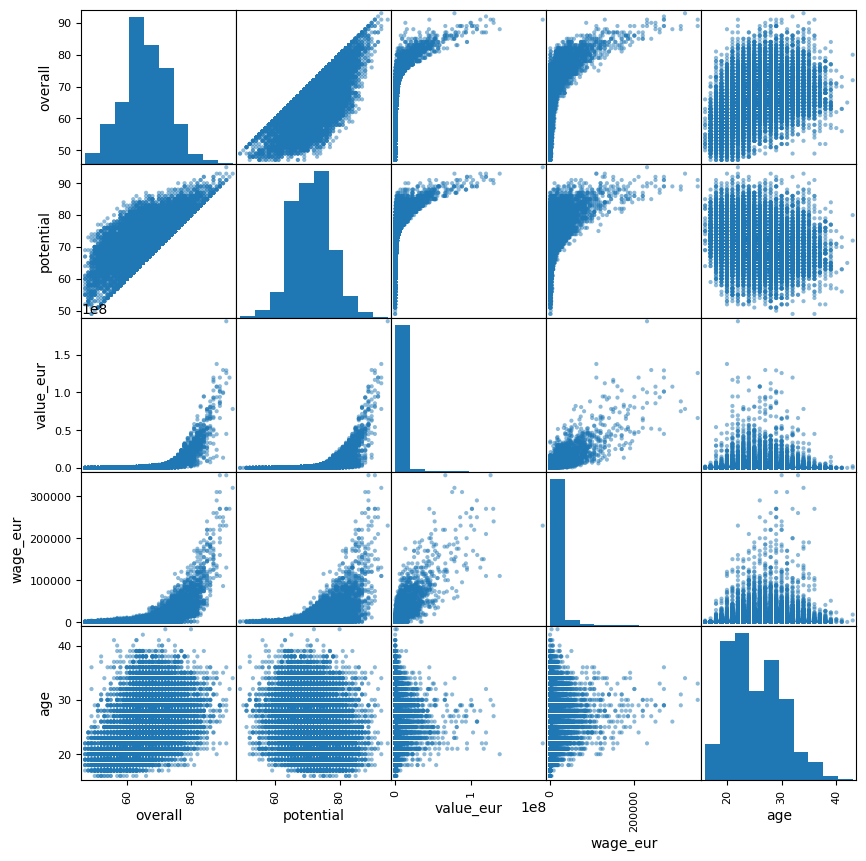

In [44]:
scatter_matrix(data, figsize=(10, 10))
plt.show()

#### Scale the datat using MinMaxScaler

In [45]:
data.dtypes

overall        int64
potential      int64
value_eur    float64
wage_eur     float64
age            int64
dtype: object

In [46]:
# manual MinMax scaling
manual = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [47]:
manual.head() # data is now on a 1-10 scale

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


##### create random centroids to begin clustering

In [48]:
def random_centroids(df, k):
    centroids = []
    for i  in range(k):
        centroid = df.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [49]:
centroids = random_centroids(manual, 5)

C:\Users\haigh\AppData\Local\Temp\ipykernel_17424\3649238830.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = df.apply(lambda x: float(x.sample()))


In [50]:
centroids

,0,1,2,3,4
overall,5.695652,4.326087,3.347826,4.913043,3.543478
potential,5.500000,4.521739,5.891304,5.695652,4.913043
value_eur,1.064534,1.023939,1.011181,1.059895,1.009789
wage_eur,1.682403,1.373391,1.064378,1.000000,1.193133
age,2.000000,5.333333,4.000000,4.666667,2.000000


##### calculate distance to centroids

In [51]:
def get_labels(df, centroids):
    distances = centroids.apply(lambda x: np.sqrt((df - x) ** 2).sum(axis=1))
    return distances.idxmin(axis=1)

In [52]:
labels = get_labels(manual, centroids)

In [53]:
labels.value_counts()

3    6564
4    4736
1    4581
0    1653
2    1631
Name: count, dtype: int64

In [54]:
# use geometric mean to re-calculate centroids
def recalc_centroids(df, labels, k):
    return df.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [55]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [56]:
def plot(df, labels, centroids, iteration):
    # transform data into 2D data
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(df)
    centroid_2d = pca.transform(centroids.T)

    # will clear the notebook cell output
    clear_output(wait=True)

    # plot data for the next iteration
    plt.title(f'Interation {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels) # plot the data
    plt.scatter(x=centroid_2d[:,0], y=centroid_2d[:,1]) # plot the centroids
    plt.show()

##### Visualization of centroids and clusters being calculated
This code will first calculate centroids and instantiate an 'old_centroids' and 'iteration'. Loop will stop when the newly calculated centroids are the same as 'old_centroids'

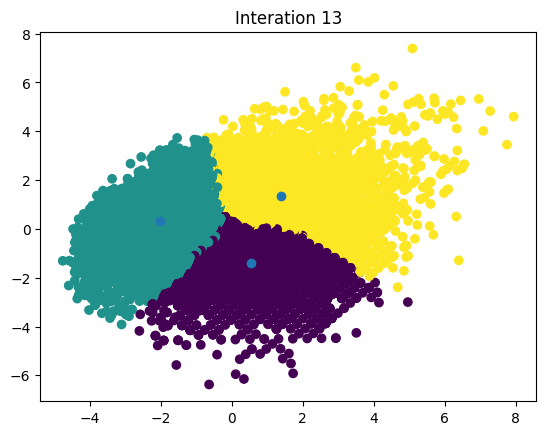

In [57]:
max_iterations = 100
k = 3

centroids = random_centroids(manual, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(manual, centroids)
    centroids = recalc_centroids(manual, labels, k)
    plot(manual, labels, centroids, iteration)
    iteration += 1

In [58]:
centroids

,0,1,2
overall,4.590169,3.376310,6.164317
potential,4.379367,5.151139,6.477234
value_eur,1.036373,1.034953,1.311501
wage_eur,1.081126,1.037000,1.516366
age,5.240503,2.487771,4.172949


In [59]:
# players in the '2' cluster
df[labels == 2][['short_name'] + features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
9424,Genaro,66,76,1800000.0,2000.0,23
9469,S. Vines,66,77,1800000.0,5000.0,22
9473,Pablo Martínez,66,75,1900000.0,7000.0,23
9506,N. Tiknizyan,66,77,1900000.0,11000.0,22


In [60]:
# players in the '1' cluster
df[labels == 1][['short_name'] + features]

,short_name,overall,potential,value_eur,wage_eur,age
3574,Teixe Gaúcho,72,72,2400000.0,8000.0,21
3652,Kainho Selva,72,72,2400000.0,7000.0,21
4284,Vanderlei Cõembra,71,71,2000000.0,7000.0,21
4285,Alex das Freitas,71,71,2000000.0,7000.0,21
4286,Antonaldo Vaz,71,71,2000000.0,15000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,70000.0,1000.0,22
19235,C. Porter,47,59,110000.0,500.0,19
19236,N. Logue,47,55,100000.0,500.0,21
19237,L. Rudden,47,60,110000.0,500.0,19


##### conclusions
When looking at the centroids you can tell that the '2' cluster contains the star players. For this cluster age is in the center of the distribution and wage, value, potential and overall scores are higher than the other clusters. 

The '1' cluster appears to be the younger, high potential players that have not achieved their full potential yet.

#### Using SKLearn implementations

In [61]:
# MinMax scaling using sklearn class
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X = data.copy()
X = scaler.fit_transform(X)

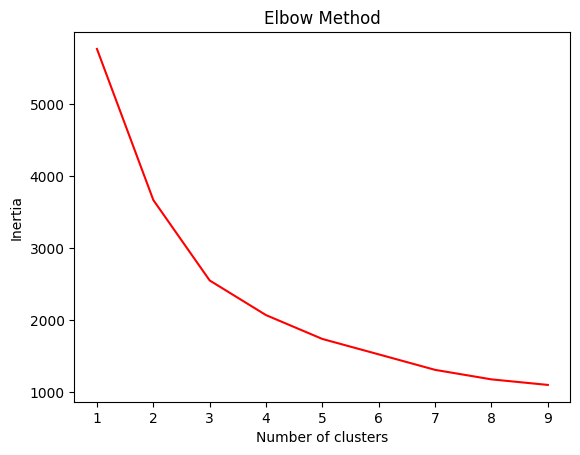

In [62]:
from sklearn.cluster import KMeans
inertia_list=[]

for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia_list, color = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

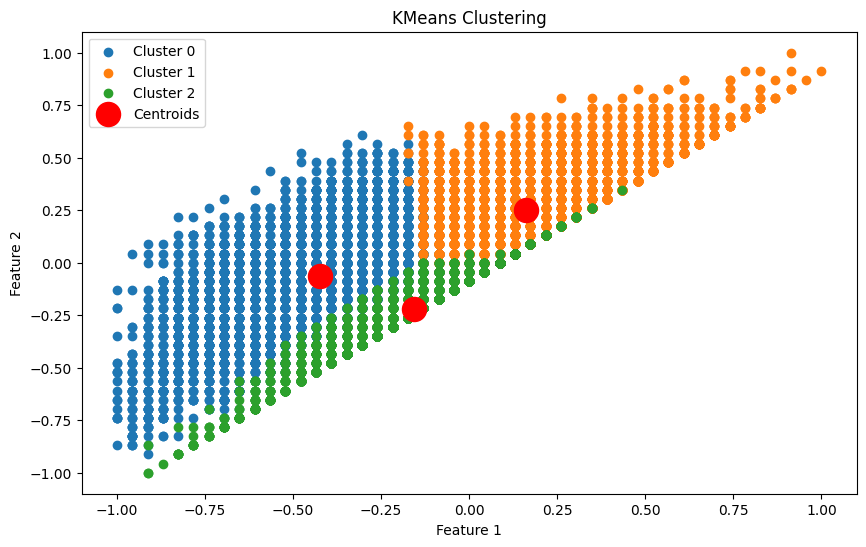

In [64]:
plt.figure(figsize=(10, 6))

# Scatter plot of the data points, colored by their assigned cluster
for i in range(kmeans.n_clusters):
    # Select data points that belong to the current cluster
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

##### Not sure why the plot looks like this. It's similar to the plot from the manual implementation, but I can't explain the linear edge on the bottom

In [79]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,0.577941,0.423865,0.287104
potential,0.623663,0.390323,0.465493
value_eur,0.045362,0.004508,0.003893
wage_eur,0.071797,0.012786,0.004344
age,0.344392,0.514230,0.190542


In [82]:
df[labels == 0][['short_name'] + features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
9632,N. Acevedo,66,79,2000000.0,2000.0,22
9691,E. Martel,66,84,2100000.0,8000.0,19
9726,C. Clark,66,86,2400000.0,6000.0,18
9771,Kayky,66,87,2700000.0,12000.0,18


In [83]:
df[labels == 1][['short_name'] + features]

,short_name,overall,potential,value_eur,wage_eur,age
388,G. Buffon,80,80,2300000.0,18000.0,43
663,Pepe Reina,78,78,1600000.0,27000.0,38
666,A. Talavera,78,78,1600000.0,8000.0,38
667,F. Quagliarella,78,78,4800000.0,19000.0,38
668,B. Foster,78,78,1600000.0,27000.0,38
...,...,...,...,...,...,...
18971,Lalkhawpuimawia,51,51,60000.0,500.0,29
19032,Song Yue,50,50,40000.0,2000.0,29
19100,J. Russell,49,49,15000.0,500.0,36
19118,Gao Xiang,49,49,35000.0,2000.0,32


In [84]:
df[labels == 2][['short_name'] + features]

,short_name,overall,potential,value_eur,wage_eur,age
5067,Jaimosa Cavaco,70,70,1700000.0,9000.0,21
5069,Paolinho Leima,70,70,1700000.0,12000.0,21
5077,Jonaldo Monteiro,70,70,1700000.0,5000.0,21
5079,Luildo Simões,70,70,1900000.0,12000.0,21
5085,Allison Sireo,70,70,1600000.0,6000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,70000.0,1000.0,22
19235,C. Porter,47,59,110000.0,500.0,19
19236,N. Logue,47,55,100000.0,500.0,21
19237,L. Rudden,47,60,110000.0,500.0,19
